# Práctica 3
## Problema de clasificación
<h4>José María Ramírez González<h4>
<h5>Grado en Ingeniería Informática curso 2021-2022<h5>

---

## Introducción

En la siguiente línea de código, podemos ver las librerías que vamos a usar para el desarrollo de la práctica:

In [ ]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import seaborn as sns
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
plt.rc('text', usetex=True)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-s

*NumPy* lo usaremos para la modificación de los datos.

*Warnings* lo usaremos para suprimir los avisos que nos puedan salir por pantalla, ya que cada vez que no converge un modelo de scikit-learn nos salta un aviso. Esto puede complicar la lectura de las baterías de prueba.

*Pandas* lo usaremos para todo lo relacionado con el manejo de los datos como Dataframes.

*Matplotlib* y *Seaborn* nos ayudarán a mostrar gráficos para visualizar información relevante durante el desarrollo de la práctica.

*Scikit-learn* implementa funciones que nos ahorrarán el desarrollo de gran parte del código.

Instalaremos LaTex en la MV para poder usarlo con *matplotlib* en los títulos.

## Análisis de los datos y definición del problema

Antes de comenzar con este apartado, vamos a tomar los datos en un DataFrame y echarles un vistazo para tener una pequeña idea de con qué vamos a trabajar.

In [ ]:
warnings.filterwarnings('ignore')

carpetaDatos = "drive/MyDrive/datos/"

bank_data = pd.read_csv(carpetaDatos+"bank-full.csv", sep=';') # Usamos sep=';' ya que los datos que se nos proporcionan están delimitados por ; en vez de ,

bank_data.describe(include='all') # Usamos include=all para que nos incluya también las columnas que no sean numéricas


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Como vemos, contamos en el dataframe con gran cantidad de columnas no numéricas.

Vamos a ir explicando un poco lo que indica cada fila de la tabla en una lista:

* *Count* indica la cantidad de datos leídos para cada columna (45211).
* *Unique* (usada para variables categóricas) indica los distintos tipos de valores que podemos tener, por ejemplo, existen **12** tipos de trabajo (columna *job*).
* *Top*, al igual que la anterior solo sirve para variables categóricas, indica la moda de los valores disponibles, por ejemplo, la mayoría de personas sólo tienen educación secundaria (columna *education*).
* *Freq* indica la cantidad de veces que aparece el valor *top* de cada columna.
* *Mean* indica la media de los valores, a partir de aquí el resto de puntos se referirá a variables numéricas.
* *std* nos indica la desviación media.
* *min* muestra el valor mínimo observado.
* Las siguientes tres filas se tratan de los percentiles, el percentil 25, 50 y 75.
* *max* muestra el valor máximo de los datos.

Viendo los datos y el nombre del archivo, podemos saber que esto se trata de los datos de un banco.

Nuestra variable a predecir sería la última columna, *y*.

Lo que queremos llevar a cabo con estos datos es encontrar un algoritmo que, en base a los datos de una persona, nos prediga el resultado de la última columna y, en caso de no contar con ella, nos lo facilite.

Vamos separar los datos en train y test usando la función *train_test_split* de *scikit-learn* y a estudiar la distribución de los datos que tenemos por el momento, a ver si se puede apreciar alguna correlación entre estos.

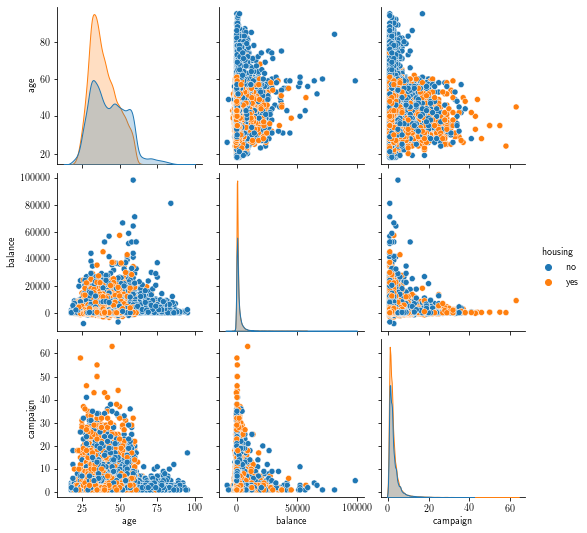

In [ ]:

feature_names = ["age", "job", "marital", "education", "balance", "housing", "loan", "poutcome", "campaign"]

X = bank_data[feature_names]

y = bank_data["y"]

# No vamos a indicar ningún random_state, haciendo que el proceso sea totalmente aleatorio, pero si que vamos a indicar que separe 80% entrenamiento, 20% test
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.2)

#https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c
sns.pairplot(train_X,hue='housing')

De las distintas gráficas que se nos presentan, podemos observar lo siguiente:

* No hay apenas presencia de *outliers*.
* Los datos de balance parecen acumularse en niveles bajos.
* Tenemos datos de prácticamente todas las edades.

Como vemos, no estamos usando todos las columnas disponibles en la tabla, ¿a qué se debe esto?

Pues bien, queremos un modelo sencillo pero eficaz, en base a las columnas que tenemos disponibles en la tabla, hay algunas que solo nos van a dficultar la tarea de encontrar un buen clasificador, como sería el caso del día y del mes, ya que son valores totalmente ajenos a la persona a la que se evalua. Por tanto, vamos a escoger estas columnas que creemos las más significativas y, si acabamos teniendo resultados peores de lo esperado, probaremos a añadir más datos al problema.

Por lo tanto, nuestra *X* serían las columnas especificadas en la anterior celda de código y el factor a predecir *y* sería la columna "y" de los datos.

Al final, tendremos que conseguir una función de la forma $f : X → y$, tal que partiendo de los datos de los que consta nuestra X obtengamos un resultado acertado sobre la y.

## Preprocesado de los datos

En este apartado vamos a realizar una sería de transformaciones en los datos, con el fin de que el modelo que implementemos más adelante nos proporcione mejores resultados.

Lo primero que vamos a hacer es comprobar la cantidad de valores nulos que tenemos, asignar variables numéricas a nuestras variables categóricas y separar en datos de entrenamiento y validación.

In [ ]:
print(train_X.isnull().sum()) # Al no obtener valores nulos, podemos en todo el dataset, podemos modificar los datos con tranquilidad
non_numerical_features = [ "job", "marital", "education", "housing", "loan", "poutcome"]

encs = []
ency = preprocessing.LabelEncoder()
for l in non_numerical_features:
  enc = preprocessing.LabelEncoder()
  train_X[l] = enc.fit_transform(train_X[l])  # Cambiamos los valores no numéricos por numéricos
  encs.append(enc)

train_y = ency.fit_transform(train_y)  # Hacemos lo mismo para la y

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
poutcome     0
campaign     0
dtype: int64


Una vez eliminadas nuestras variables no númericas y sustituidas por variables numéricas, vamos a observar nuestro conjunto de entrenamiento X.

In [ ]:
train_X.describe()

,age,job,marital,education,balance,housing,loan,poutcome,campaign
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.900022,4.349859,1.169368,1.227225,1345.866717,0.560559,0.161248,2.557083,2.772395
std,10.615126,3.273346,0.609241,0.746625,2997.661186,0.496327,0.367765,0.993575,3.116994
min,18.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000
25%,33.000000,1.000000,1.000000,1.000000,72.000000,0.000000,0.000000,3.000000,1.000000
50%,39.000000,4.000000,1.000000,1.000000,446.000000,1.000000,0.000000,3.000000,2.000000
75%,48.000000,7.000000,2.000000,2.000000,1430.000000,1.000000,0.000000,3.000000,3.000000
max,95.000000,11.000000,2.000000,3.000000,102127.000000,1.000000,1.000000,3.000000,63.000000


Como vemos, ya no tenemos variables no numéricas, lo cual va a facilitar la comprensión por parte de nuestro modelo de clasificación.

Respecto a normalizar y estandarizar los valores, a priori no hay indicativo de que vaya a proporcionarnos mejores resultados, puesto que depende en gran medida del modelo usado, así que optaremos por realizar pruebas empíricas para descartar o aplicar la estandarización y/o normalización.

## Modelos a explorar

Una vez que ya tenemos los datos listos para su uso, sólo nos queda escoger qué modelo vamos a usar para obtener el menor porcentaje de error en la clasificación posible.

Tras realizar una pequeña investigación por la web de [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) y decantarnos por varios modelos lineales, hemos seleccionado los siguientes:

* Un modelo de [regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), con el que probaremos varias penalizaciones, comparando los resultados.
* Un modelo de [clasificador con SGD](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier), con el que probaremos varias funciones de pérdida (*hinge*, *squared_hinge*, *perceptron* y *modified_huber*)
* Un modelo de clasificación [*PassiveAggressive*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier), con el que experimentaremos con el tamaño de paso.
* A su vez, para contrastar frente a todos los modelos lineales expuestos anteriormente, vamos a usar [árboles de decision](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) y, para evitar un poco más el posible ruido que tengamos en la muestra, un [bosque aleatorio](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier), que implementará varios árboles de decisión.

Los siguientes apartados tratarán sobre los distintos algoritmos y realizaremos una serie de pruebas empíricas sobre los mismos para determinar los mejores valores posibles. Una vez tengamos el algoritmo puesto a punto, mostraremos el aprendizaje en función del número de datos de entrada.

### Regresión logística

Primero vamos a probar el modelo estándar de regresión logística.

Este modelo es probablemente el más simple de todos los que vamos a probar.

Tenemos varios *solvers* disponibles y algunas opciones de configuración, entre ella podemos escoger la *penalty*, que simplemente se trata de la norma estadística que podemos usar con el modelo, también podemos elegir entre varios *solvers*, que son los algoritmos que se usan para la optimización.

Vamos a hacer una batería de prueba con las *penalties* l1 y l2 y los *solvers* *saga*, *lbfgs* y *newton-cg*.

Es importante destacar, antes de comenzar la batería de pruebas, que tanto *lbfgs* como *newton-cg* no son compatibles con la penalty l1, por lo que sólo podremos realizar pruebas con ambas penalties con *saga*.

Para todos los casos vamos a tener una función de pérdida polinómica (*multinomial* en inglés), con la que se trabaja en un rango de probabilidad.

Vamos a permitir que agote las 1000 iteraciones máximas, poniendo la tasa de parada realmente baja.

In [ ]:
max_iters = 1000

penalties = ['l1', 'l2']
solvers = ['saga', 'lbfgs', 'newton-cg']

logisticReg_results = {}

for solver in solvers:
  if solver == 'saga':
    for penalty in penalties:
      logisticReg = linear_model.LogisticRegression(penalty=penalty, max_iter=max_iters, solver=solver, multi_class='multinomial')
      logisticReg.fit(train_X, train_y)
      logisticReg_results[solver+" "+penalty] = logisticReg.score(train_X, train_y)
  else:
    logisticReg = linear_model.LogisticRegression(penalty='l2', max_iter=max_iters, solver=solver, multi_class='multinomial')
    logisticReg.fit(train_X, train_y)
    logisticReg_results[solver] = logisticReg.score(train_X, train_y)

print(logisticReg_results)

{'saga l1': 0.8818845388188454, 'saga l2': 0.8818845388188454, 'lbfgs': 0.8818292413182924, 'newton-cg': 0.8818292413182924}


Como vemos, obtienen todos valores similares de *Ein*, siendo ligeramente inferior *lbfgs*, aunque esta diferencia sea realmente minúscula.

No obstante, debido a que los resultados obtenidos son exactamente los mismos en los otros tres, vamos a optar por continuar las pruebas con *newton-cg*.

Vamos a ver una gráfica en la que mostraremos cómo vamos aprendiendo en función de los datos de entrada del problema. Contaremos con dos líneas que nos dirán el error dentro de la muestra y el error en el conjunto de validación.

Para que no tarde demasiado en ejecutarse esta parte, vamos a reducir el número máximo de iteraciones a 100.

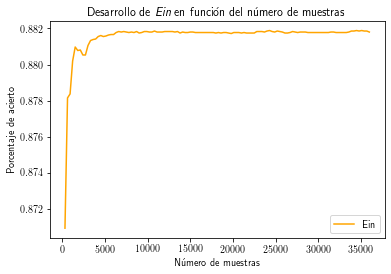

In [ ]:

logisticReg = linear_model.LogisticRegression(penalty='l2', max_iter=100, solver='newton-cg', multi_class='multinomial')
accError_logisticReg = {}
for i in range(300,len(train_X),300):
  logisticReg.fit(train_X.iloc[:i], train_y[:i])
  accError_logisticReg[i] = logisticReg.score(train_X,train_y)

plt.plot(list(accError_logisticReg.keys()), list(accError_logisticReg.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel("Porcentaje de acierto")
plt.legend()
plt.show()

Como vemos, a partir de ~1400 muestras se estabiliza un poco, vamos a realizar otra gráfica donde se vea tan solo hasta ese número de muestras para ver en más detalle el aprendizaje.

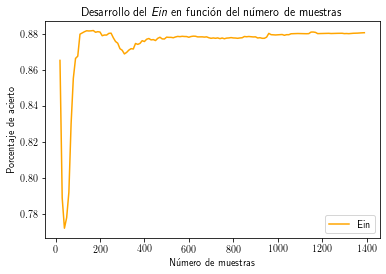

In [ ]:
logisticReg = linear_model.LogisticRegression(penalty='l2', max_iter=100, solver='newton-cg', multi_class='multinomial')
accError_logisticReg = {}
for i in range(20,1400,10):
  logisticReg.fit(train_X.iloc[:i], train_y[:i])
  accError_logisticReg[i] = logisticReg.score(train_X,train_y)

plt.plot(list(accError_logisticReg.keys()), list(accError_logisticReg.values()), 'orange', label='Ein')
plt.title(r'Desarrollo del \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel("Porcentaje de acierto")
plt.legend()
plt.show()

Aquí se aprecian las etapas tempranas del aprendizaje, e incluso con pocas muestras el resultado obtenido es bastante bueno.

### Clasificador SGD

En este apartado vamos a comprobar la validez de este clasificador, que usa SGD como optimizador.

Para determinar la función de pérdida a usar vamos a realizar una batería de pruebas entre las siguientes:

* *hinge*, SVM linear.
* *squared_hinge*, similar a *hinge*, pero con penalización cuadrática.
* *perceptron*, pérdida lineal, similar a la del perceptrón estándar.
* *modified_huber*, función de pérdida con una mayor tolerancia a los *outliers*. Teniendo en cuenta la ausencia de estos en nuestros datos, no debería aportar resultados mejores que el resto.

A su vez, también vamos a determinar el valor de *penalty*, por lo que para cada función de pérdida probaremos con *l2*, *l1* y *elasticnet*, siendo esta última una combinación de las otras dos


Vamos a realizar la batería de pruebas. De las distintas opciones escogeremos la que mejores resultados nos de y la analizaremos mas en profundidad.

Al igual que con la regresión logística, fijaremos el máximo de iteraciones en 1000.

Si nos fijamos en la documentación de scikit-learn, se nos insta a estandarizar los datos, ya que para este clasificador suele dar mejores resultados, por lo que vamos a realizar una batería con los datos estandarizados y otra sin estandarizar. Esto se debe a la elección del *lr* por defecto (*optimal*), que implementa una elección heurística para aumentar o disminuir el *lr* propuesta por Leon Bottou que presenta mejores resultados si los datos están estandarizados.



In [ ]:
max_iters = 1000

losses = ['hinge', 'squared_hinge', 'perceptron', 'modified_huber']
penalties = ['l1', 'l2', 'elasticnet']

scaler = preprocessing.StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)
SGD_results = {}

for loss in losses:
  for penalty in penalties:
    SGD_solver = linear_model.SGDClassifier(max_iter=max_iters, loss=loss, penalty=penalty)
    SGD_solver.fit(train_X, train_y)
    SGD_results[loss+" " + penalty] = SGD_solver.score(train_X, train_y)

SGD_scaled_results = {}

for loss in losses:
  for penalty in penalties:
    SGD_solver = linear_model.SGDClassifier(max_iter=max_iters, loss=loss, penalty=penalty)
    SGD_solver.fit(train_X_scaled, train_y)
    SGD_scaled_results[loss+" " + penalty] = SGD_solver.score(train_X_scaled, train_y)

print("Not scaled")
print(SGD_results)

print("\nScaled")
print(SGD_scaled_results)

SGD_values = list(SGD_results.values())
SGD_scaled_values = list(SGD_scaled_results.values())
media_acierto = sum(SGD_values)/len(SGD_values)
media_acierto_scaled = sum(SGD_scaled_values)/len(SGD_scaled_values)

print("\n\nAl no estandarizar tenemos una media de {}".format(media_acierto))
print("Estandarizando tenemos una media de {}".format(media_acierto_scaled))

Not scaled
{'hinge l1': 0.8386418933864189, 'hinge l2': 0.8577748285777483, 'hinge elasticnet': 0.8194260119442601, 'squared_hinge l1': 0.8509732360097324, 'squared_hinge l2': 0.6295896925458969, 'squared_hinge elasticnet': 0.8276100420261004, 'perceptron l1': 0.8234903782349038, 'perceptron l2': 0.8238498119884982, 'perceptron elasticnet': 0.8696361424463614, 'modified_huber l1': 0.8492313647423136, 'modified_huber l2': 0.8221355894713559, 'modified_huber elasticnet': 0.627211900022119}

Scaled
{'hinge l1': 0.8818568900685689, 'hinge l2': 0.8818845388188454, 'hinge elasticnet': 0.8818845388188454, 'squared_hinge l1': 0.8818845388188454, 'squared_hinge l2': 0.880557398805574, 'squared_hinge elasticnet': 0.878124308781243, 'perceptron l1': 0.8818845388188454, 'perceptron l2': 0.8660694536606945, 'perceptron elasticnet': 0.7098816633488166, 'modified_huber l1': 0.8818845388188454, 'modified_huber l2': 0.8709909312099093, 'modified_huber elasticnet': 0.8818845388188454}


Al no estandariz

Como podemos observar en los resultados, estandarizando los datos obtenemos, de media, mejores resultados en las pruebas, exceptuando el perceptrón.

Si nos vamos a la batería de pruebas, podemos ver que los mejores resultados nos lo dan aquellos que usan *elasticnet* frente a *L1* y *L2*.

Vamos a ejecutar otra pequeña batería sólo usando *elasticnet* y veamos los resultados que nos ofrece, así iremos fijando parámetros poco a poco.

In [ ]:
SGD_results = {}

for loss in losses:
  SGD_solver = linear_model.SGDClassifier(max_iter=max_iters, loss=loss, penalty='elasticnet')
  SGD_solver.fit(train_X, train_y)
  SGD_results[loss] = SGD_solver.score(train_X, train_y)

SGD_scaled_results = {}

for loss in losses:
  SGD_solver = linear_model.SGDClassifier(max_iter=max_iters, loss=loss, penalty='elasticnet')
  SGD_solver.fit(train_X_scaled, train_y)
  SGD_scaled_results[loss] = SGD_solver.score(train_X_scaled, train_y)

print("Not scaled")
print(SGD_results)

print("\nScaled")
print(SGD_scaled_results)

SGD_values = list(SGD_results.values())
SGD_scaled_values = list(SGD_scaled_results.values())
media_acierto = sum(SGD_values)/len(SGD_values)
media_acierto_scaled = sum(SGD_scaled_values)/len(SGD_scaled_values)

print("\n\nAl no estandarizar tenemos una media de {}".format(media_acierto))
print("Estandarizando tenemos una media de {}".format(media_acierto_scaled))

Not scaled
{'hinge': 0.8819121875691219, 'squared_hinge': 0.8745299712452997, 'perceptron': 0.3980590577305906, 'modified_huber': 0.5130778588807786}

Scaled
{'hinge': 0.8818845388188454, 'squared_hinge': 0.8818845388188454, 'perceptron': 0.8818845388188454, 'modified_huber': 0.8818845388188454}


Al no estandarizar tenemos una media de 0.6668947688564477
Estandarizando tenemos una media de 0.8818845388188454


A la vista de los resultados obtenidos en esta prueba, queda claro que tenemos que estandarizar los datos si queremos obtener mejores resultados.

Ahora bien, si nos fijamos en los resultados obtenidos con los datos estandarizados, tenemos que son todos igual de buenos, exceptuando el perceptrón, ¿còmo nos decidimos por un método u otro?

Vamos a realizar un pequeño número de gráficas, similares a la que realizamos con la evolución de la regresión logística y veamos el patrón de aprendizaje de cada uno, con 100 iteraciones de máximo por algoritmo.

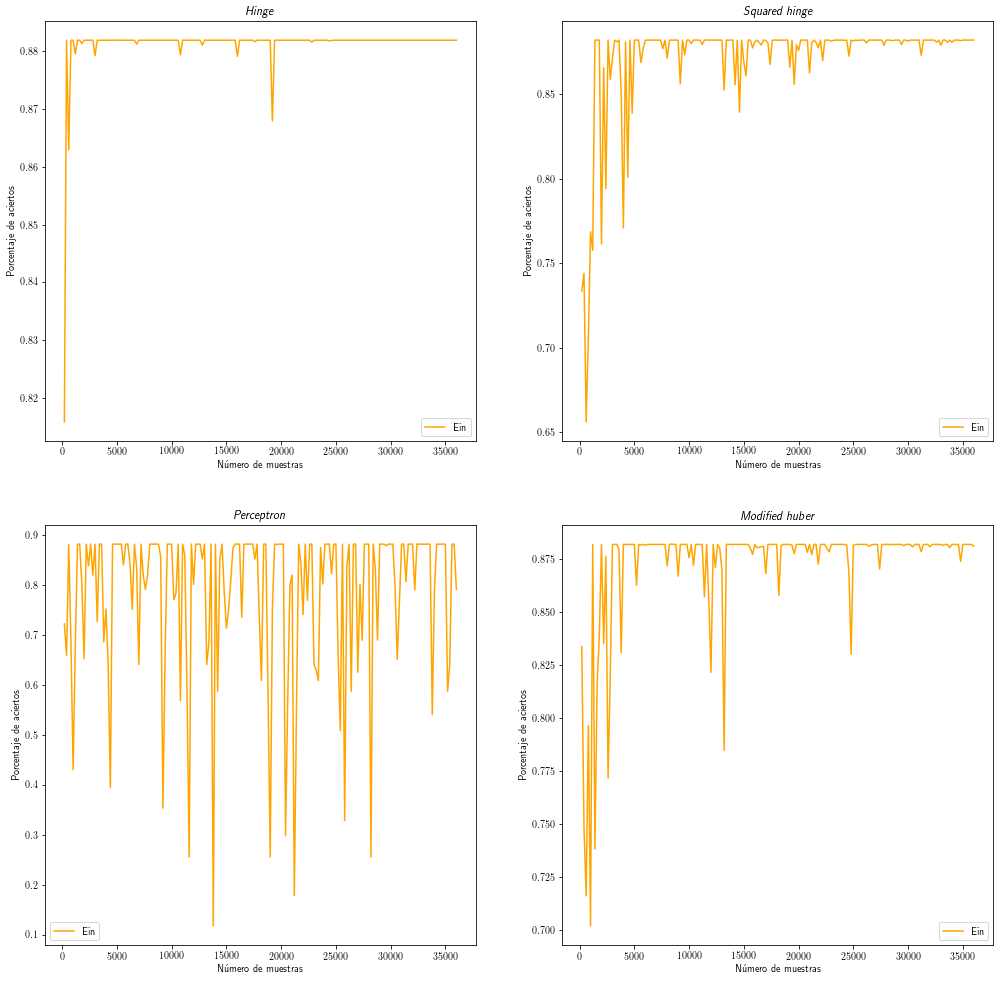

In [ ]:
SGD_hinge = linear_model.SGDClassifier(max_iter=100, loss='hinge', penalty='elasticnet')
SGD_squared_hinge = linear_model.SGDClassifier(max_iter=100, loss='squared_hinge', penalty='elasticnet')
SGD_perceptron = linear_model.SGDClassifier(max_iter=100, loss='perceptron', penalty='elasticnet')
SGD_modified_huber = linear_model.SGDClassifier(max_iter=100, loss='modified_huber', penalty='elasticnet')
accError_hinge = {}
accError_squared_hinge = {}
accError_perceptron = {}
accError_modified_huber = {}

for i in range(200,len(train_X_scaled),200):
  SGD_hinge.fit(train_X_scaled[:i], train_y[:i])
  SGD_squared_hinge.fit(train_X_scaled[:i], train_y[:i])
  SGD_perceptron.fit(train_X_scaled[:i], train_y[:i])
  SGD_modified_huber.fit(train_X_scaled[:i], train_y[:i])

  accError_hinge[i] = SGD_hinge.score(train_X_scaled,train_y)
  accError_squared_hinge[i] = SGD_squared_hinge.score(train_X_scaled,train_y)
  accError_perceptron[i] = SGD_perceptron.score(train_X_scaled,train_y)
  accError_modified_huber[i] = SGD_modified_huber.score(train_X_scaled,train_y)


keys_hinge = np.array(list(accError_hinge.keys()))
keys_squared_hinge = np.array(list(accError_squared_hinge.keys()))
keys_perceptron = np.array(list(accError_perceptron.keys()))
keys_modified_huber = np.array(list(accError_modified_huber.keys()))

# Para mostrar de esta forma las gráficas hemos tenido las siguientes fuentes:
# https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
# https://datascienceparichay.com/article/change-figure-size-matplotlib/

fig, ax = plt.subplots(2,2, figsize=(17,17))    # Cambiamos el tamaño de la figura para que podamos apreciarlas con el detalle suficiente

ax[0,0].plot(keys_hinge, list(accError_hinge.values()), 'orange', label='Ein')
ax[0,0].set_xlabel("Número de muestras")
ax[0,0].set_ylabel("Porcentaje de aciertos")
ax[0,0].set_title(r"\textit{Hinge}")
ax[0,0].legend()

ax[0,1].plot(keys_squared_hinge, list(accError_squared_hinge.values()), 'orange', label='Ein')
ax[0,1].set_xlabel("Número de muestras")
ax[0,1].set_ylabel("Porcentaje de aciertos")
ax[0,1].set_title(r"\textit{Squared hinge}")
ax[0,1].legend()

ax[1,0].plot(keys_perceptron, list(accError_perceptron.values()), 'orange', label='Ein')
ax[1,0].set_xlabel("Número de muestras")
ax[1,0].set_ylabel("Porcentaje de aciertos")
ax[1,0].set_title(r"\textit{Perceptron}")
ax[1,0].legend()

ax[1,1].plot(keys_modified_huber, list(accError_modified_huber.values()), 'orange', label='Ein')
ax[1,1].set_xlabel("Número de muestras")
ax[1,1].set_ylabel("Porcentaje de aciertos")
ax[1,1].set_title(r"\textit{Modified huber}")
ax[1,1].legend()

plt.show()

Vamos a analizar cada gráfica:

* Comenzando por *perceptron*, tenemos el comportamiento típico de un perceptrón sin pocket, estudiado en clase.
* *Modified huber* parece tardar más en estabilizarse, lo que sugiere que necesite tamaños de muestra muy grandes para funcionar correctamente, pero es verdad que acaba cada vez más cerca del límite conforme aumentamos el tamaño de muestra.
* *Squared hinge* presenta un comportamiento un tanto similar a *modified huber*.
* *Hinge* presenta algunos picos al comienzo, pero parece estabilizarse bastante rápido.

Tras analizar las gráficas de aprendizaje, vamos a optar por usar *hinge*, ya que parece adaptarse bien incluso con pocas muestras y no presenta un comportamiento tan caótico como el resto.

Vamos ahora a fijarnos en las primeras etapas de *hinge*, aumentando antes el número de iteraciones a 1000, y a observar con detalle qué está sucediendo.

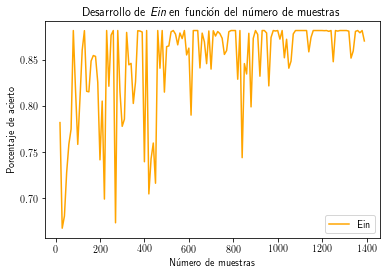

In [ ]:
SGD_hinge = linear_model.SGDClassifier(max_iter=1000, loss='hinge', penalty='elasticnet')
accError_hinge = {}
for i in range(20,1400,10):
  SGD_hinge.fit(train_X_scaled[:i], train_y[:i])
  accError_hinge[i] = SGD_hinge.score(train_X_scaled,train_y)

plt.plot(list(accError_hinge.keys()), list(accError_hinge.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel("Porcentaje de acierto")
plt.legend()
plt.show()

Como se puede ver, presenta un período corto de aprendizaje algo caótico hasta que comienza a estabilizarse a partir de unas 1000 muestras.

### Modelo Pasivo-Agresivo

En este modelo, bastante similar al perceptrón y pensado para aprendizaje a gran escala, tan sólo disponemos de dos funciones de pérdida distintas, *hinge* y *squared_hinge*.

En base a los experimentos anteriores, sólo vamos a usar *hinge* y vamos a prescindir de someter la función de pérdida a batería de pruebas.

Sin embargo, si que tenemos un parámetro más, el tamaño del paso, que iremos variando de 0.05 en 0.05 en el intervalo $[0.4,1.6]$.

Vamos a realizar nuestra ya habitual batería de pruebas para comprobar el efecto del tamaño del paso y elegir el que mejor se ajuste a nosotros.

En este caso concreto, en vez de los habituales 1000 pasos, vamos a conceder 10000.

In [ ]:
max_iters = 10000

PassiveAgg_results = {}

for c in range(40, 165, 5):
    PassiveAgg = linear_model.PassiveAggressiveClassifier(loss='hinge', max_iter=max_iters, C=c/100)
    PassiveAgg.fit(train_X, train_y)
    PassiveAgg_results["C: "+str(c)] = PassiveAgg.score(train_X, train_y)

print(PassiveAgg_results)

{'C: 40': 0.8761612475116125, 'C: 45': 0.8818568900685689, 'C: 50': 0.7528478212784782, 'C: 55': 0.2015040920150409, 'C: 60': 0.8817739438177394, 'C: 65': 0.8817739438177394, 'C: 70': 0.8359323158593231, 'C: 75': 0.8798938287989383, 'C: 80': 0.8755253262552533, 'C: 85': 0.8753041362530414, 'C: 90': 0.8818845388188454, 'C: 95': 0.8812762663127627, 'C: 100': 0.8813592125635922, 'C: 105': 0.881635700066357, 'C: 110': 0.714554302145543, 'C: 115': 0.6189449236894492, 'C: 120': 0.8711844724618447, 'C: 125': 0.8229097544790975, 'C: 130': 0.8811656713116567, 'C: 135': 0.6994857332448573, 'C: 140': 0.8818292413182924, 'C: 145': 0.8117120106171201, 'C: 150': 0.8737834549878345, 'C: 155': 0.8777095775270958, 'C: 160': 0.8818845388188454}


Como vemos en los resultados, la variación de *C* afecta a los mismos de una forma que parece ser aleatoria. Vamos a repetir el experimento una segunda vez para comprobar si se obtienen resultados similares.

In [ ]:
max_iters = 10000

PassiveAgg_results = {}

for c in range(40, 165, 5):
    PassiveAgg = linear_model.PassiveAggressiveClassifier(loss='hinge', max_iter=max_iters, C=c/100)
    PassiveAgg.fit(train_X, train_y)
    PassiveAgg_results["C: "+str(c)] = PassiveAgg.score(train_X, train_y)

print(PassiveAgg_results)

{'C: 40': 0.6371101526211015, 'C: 45': 0.869497898694979, 'C: 50': 0.8818015925680159, 'C: 55': 0.8818292413182924, 'C: 60': 0.7483134262331342, 'C: 65': 0.8818292413182924, 'C: 70': 0.8818845388188454, 'C: 75': 0.8818568900685689, 'C: 80': 0.8707697412076975, 'C: 85': 0.8463835434638355, 'C: 90': 0.8449458084494581, 'C: 95': 0.8811933200619332, 'C: 100': 0.8805297500552975, 'C: 105': 0.7144437071444371, 'C: 110': 0.7652621101526211, 'C: 115': 0.8818845388188454, 'C: 120': 0.8816633488166334, 'C: 125': 0.8818845388188454, 'C: 130': 0.8818568900685689, 'C: 135': 0.8818568900685689, 'C: 140': 0.8581619110816191, 'C: 145': 0.7203605397036054, 'C: 150': 0.8818845388188454, 'C: 155': 0.773418491484185, 'C: 160': 0.8417109046671091}


Efectivamente, los resultados parecen ser inconsistentes en función del valor C escogido.
Vamos a echarle un vistazo a una gráfica para observar el aprendizaje de este modelo y, si nos parece demasiado aleatorio, descartaremos el modelo.

Vamos a usar el valor por defecto de *C*, $1$, para realizar la gráfica.

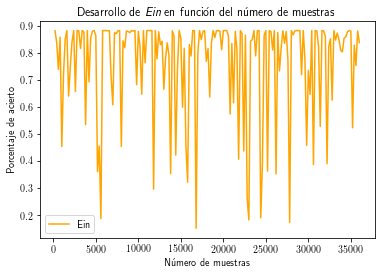

In [ ]:
PassiveAgg = linear_model.PassiveAggressiveClassifier(loss='hinge', max_iter=max_iters)
PassiveAgg_results = {}
for i in range(200,len(train_X),200):
  PassiveAgg.fit(train_X.iloc[:i], train_y[:i])
  PassiveAgg_results[i] = PassiveAgg.score(train_X,train_y)

plt.plot(list(PassiveAgg_results.keys()), list(PassiveAgg_results.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel("Porcentaje de acierto")
plt.legend()
plt.show()

Efectivamente, este comportamiento parece bastante aleatorio, no obstante, antes de descartar por completo el modelo, vamos a probar a realizar la misma gráfica anterior pero con 100000 iteraciones.

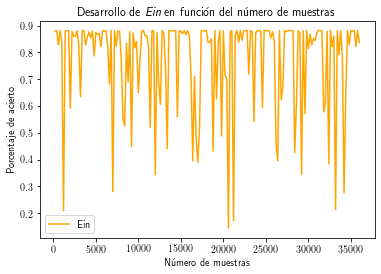

In [ ]:
max_iters = 100000
PassiveAgg = linear_model.PassiveAggressiveClassifier(loss='hinge', max_iter=max_iters)
PassiveAgg_results = {}
for i in range(200,len(train_X),200):
  PassiveAgg.fit(train_X.iloc[:i], train_y[:i])
  PassiveAgg_results[i] = PassiveAgg.score(train_X,train_y)

plt.plot(list(PassiveAgg_results.keys()), list(PassiveAgg_results.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel("Porcentaje de acierto")
plt.legend()
plt.show()

A la vista de los resultados, me temo que vamos a descartar este modelo como posible candidato, debido al comportamiento errático que presenta.

### Árboles de decisión y bosques

En este apartado vamos a ver cómo se comportan los árboles de decisión y los bosques aleatorios. Vamos a comparar los resultados obtenidos aquí con los modelos lineales que hemos probado anteriormente.

Vamos primero a realizar una batería de pruebas entre los diferentes valores que puede tomar un árbol para usar como criterio a la hora de dividirse en ramas, más adelante, aplicaremos lo aprendido de la batería y estudiaremos los parámetros del bosque para, finalmente, acabar con un bosque que nos proporcione los mejores resultados posibles.

Tenemos que elegir entre los siguientes criterios:
* *gini*, que implementa la [*impureza Gini*](https://www.learndatasci.com/glossary/gini-impurity/), una medida que determina cómo dividir los nodos en un árbol.
* *entropy*, que implementa la [*ganancia de información de Shannon*](https://towardsdatascience.com/entropy-and-information-gain-b738ca8abd2a), en la que se intenta reducir la entropía conforme dividimos el árbol.

In [ ]:
criterions = [ 'gini', 'entropy']

decTree_results = {}

for criteria in criterions:
  decTree = tree.DecisionTreeClassifier(criterion=criteria)
  decTree.fit(train_X, train_y)
  decTree_results[criteria] = decTree.score(train_X, train_y)

print(decTree_results)

{'gini': 0.9982581287325812, 'entropy': 0.9982581287325812}


Como vemos, el resultado de *entropy* es similar al de gini.

Vamos a probar a realizar de nuevo la prueba, pero con los datos estandarizados.

In [ ]:
decTree_results = {}

for criteria in criterions:
  decTree = tree.DecisionTreeClassifier(criterion=criteria)
  decTree.fit(train_X_scaled, train_y)
  decTree_results[criteria] = decTree.score(train_X_scaled, train_y)

print(decTree_results)

{'gini': 0.9982581287325812, 'entropy': 0.9982581287325812}


La tendencia se mantiene, siendo *entropy* y*gini* similares, y realmente no se aprecia ninguna diferencia sustancial entre usar datos estandarizados y no estandarizados.

Ahora que ya sabemos el criterio a usar, vamos a construir un bosque.

En la batería que realizaremos sobre el bosque, probaremos a cambiar tanto el número de árboles del bosque como las *max_features*, que hace referencia al número de factores a tener en cuenta a la hora de realizar una división de cada árbol.

In [ ]:
decTree_results = {}

feature_selector = ['sqrt', 'log2', None]

for feature in feature_selector:
  for n_tree in range(40,600,40):
    decTree = ensemble.RandomForestClassifier(criterion='entropy', max_features=feature, n_estimators=n_tree)
    decTree.fit(train_X, train_y)
    decTree_results[str(feature)+" "+ str(n_tree)] = decTree.score(train_X, train_y)

print(decTree_results)

{'sqrt 40': 0.9958526874585268, 'sqrt 80': 0.9979816412298164, 'sqrt 120': 0.9982028312320284, 'sqrt 160': 0.9982581287325812, 'sqrt 200': 0.9982581287325812, 'sqrt 240': 0.9982581287325812, 'sqrt 280': 0.9982581287325812, 'sqrt 320': 0.9982581287325812, 'sqrt 360': 0.9982581287325812, 'sqrt 400': 0.9982581287325812, 'sqrt 440': 0.9982581287325812, 'sqrt 480': 0.9982581287325812, 'sqrt 520': 0.9982581287325812, 'sqrt 560': 0.9982581287325812, 'log2 40': 0.9962950674629507, 'log2 80': 0.9978710462287105, 'log2 120': 0.9982581287325812, 'log2 160': 0.9982028312320284, 'log2 200': 0.9982581287325812, 'log2 240': 0.9982581287325812, 'log2 280': 0.9982581287325812, 'log2 320': 0.9982581287325812, 'log2 360': 0.9982581287325812, 'log2 400': 0.9982581287325812, 'log2 440': 0.9982581287325812, 'log2 480': 0.9982581287325812, 'log2 520': 0.9982581287325812, 'log2 560': 0.9982581287325812, 'None 40': 0.9961844724618447, 'None 80': 0.99795399247954, 'None 120': 0.9982581287325812, 'None 160': 0.9

Si observamos los resultados, se puede apreciar que son todos bastante similares entre si, y bastante buenos.

Nos obstante hay algunos valores que destacan, como sería el de *max_features*=None, con 160 árboles.

Vamos a proseguir las pruebas con estos parámetros:
* *criterion*=*'entropy'*.
* *max_features*=*None*.
* *n_estimators*=160.

Ahora, vamos a ver el aprendizaje en función del número de la muestra.

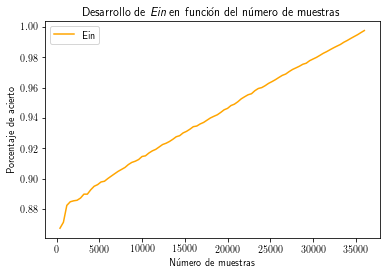

In [ ]:
decTree = ensemble.RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=160)
decTree_results = {}
for i in range(400,len(train_X),400):
  decTree.fit(train_X.iloc[:i], train_y[:i])
  decTree_results[i] = decTree.score(train_X,train_y)

plt.plot(list(decTree_results.keys()), list(decTree_results.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel("Porcentaje de acierto")
plt.legend()
plt.show()

Resulta un tanto curioso que en este caso, en contraposición de los modelos lineales, el *Ein* mejora linealmente con el número de muestras. Esto probablemente se deba a que el bosque acabe comprendiendo casi perfectamente el conjunto de datos de entrenamiento, ya que ha visto todos los casos, en cambio, habrá datos que no correspondan a los vistos en el entrenamiento en el conjunto de validación, por lo que realmente estaríamos aprendiendo ruido de nuestro conjunto de datos, no información útil.

Vamos a ver más de cerca las etapas tempranas del aprendizaje.

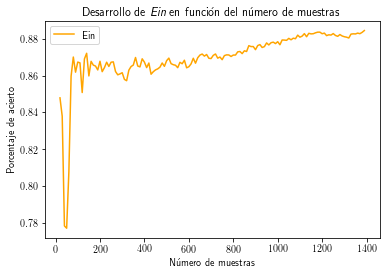

In [ ]:
decTree = ensemble.RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=160)
decTree_results = {}
for i in range(20,1400,10):
  decTree.fit(train_X.iloc[:i], train_y[:i])
  decTree_results[i] = decTree.score(train_X,train_y)

plt.plot(list(decTree_results.keys()), list(decTree_results.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel("Porcentaje de acierto")
plt.legend()
plt.show()

Como vemos, durante las primeras 1400 muestras, *Ein* fluctúa ligeramente, no obstante, a partir de las 1400 muestras, empeará a tener una tendencia ascendente hasta ocurrir lo que se podía apreciar en la gráfica anterior.


Este modelo no lo vamos a implementar como posible solución, ya que se nos piden modelos lineales, no obstante, si que queríamos visualizar las diferencias entre modelos lineales y los árboles y bosques, ya que estos últimos también resultan ser modelos muy usados en la realidad.

Como hemos podido observar, los modelos lineales no tienen nada que envidiarle a los árboles y bosques, pues para el conjunto de datos que estamos entrenando presentan resultados de *Ein* bastante similares hasta que, claro está, el árbol y los bosques tienen en cuenta todos los posibles casos del conjunto de datos de entrenamiento. También tenemos que tener en cuenta el tiempo de ejecución, siendo el de los modelos lineales bastante inferior al de los árboles y bosques.

## Modelo elegido

Como hemos visto en la sección anterior, de entre los modelos lineales tenemos **dos** posibles candidatos:
* *SGDClassifier* con función de pérdida *hinge* y penalty *elasticnet*.
* Una regresión logística con penalty *l2*, resolviéndola con *newton-cg* y una función de pérdida polinómica.

Ahora bien, ¿cómo nos decidimos entre estos dos modelos?
Para decidirnos, vamos a realizar *CV* (*cross validation*) para comprobar de forma más precisa el error en el aprendizaje y, por tanto, aquel modelo con el que deberíamos tener menor error fuera de la muestra .


In [ ]:
SGD = linear_model.SGDClassifier(max_iter=1000, loss='hinge', penalty='elasticnet')
logisticReg = linear_model.LogisticRegression(penalty='l2', max_iter=1000, solver='newton-cg', multi_class='multinomial')

score_SGD = model_selection.cross_val_score(SGD, train_X_scaled, train_y)
score_logReg = model_selection.cross_val_score(logisticReg, train_X, train_y)

print("Media SGD: {}".format(score_SGD.mean()))
print("Media logistic Regression: {}".format(score_logReg.mean()))

Media SGD: 0.8818845413349659
Media logistic Regression: 0.8818015882034851


En base a los resultados, ambos tienen porcentajes de acierto similares, siendo la del SGD ligeramente superior, lo cual nos deja un poco a nuestro gusto el elegir el modelo a usar. Debido a la mayor simplicidad de uso, vamos a optar por el *SGDClassifier* con el que, aunque haya que estandarizar los datos, tenemos menos parámetros que configurar y por tanto su uso va a ser más simple, además, el tiempo de ejecución es ligeramente inferior, lo cual hemos comprobado al ejecutar los algoritmos.

Vamos a obtener nuestro *score* con los datos de test para estimar, ahora si, el error que tendremos fuera de la muestra.

Para ello, vamos a aplicar las mismas transformaciones que aplicamos para los datos de train, pero con los de test, ya que conservamos los *scalers* y *encoders* que usamos previamente.

In [ ]:
non_numerical_features = [ "job", "marital", "education", "housing", "loan", "poutcome"]

for l,i in zip(non_numerical_features, range(len(non_numerical_features))):
  test_X[l] = encs[i].transform(test_X[l])  # Cambiamos los valores no numéricos por numéricos

test_y = ency.transform(test_y)

test_X_scaled = scaler.transform(test_X)

SGD.fit(train_X_scaled, train_y)

final_score_SGD = SGD.score(test_X_scaled, test_y)

print("Estimación de Eout para SGD: %s" % final_score_SGD)

Estimación de Eout para SGD: 0.8875373216852814


El *SGDClassifier* toma como parámetros la penalty y la función de pérdida.
Estos parámetros los explicamos y justificamos su elección a la hora de realizar los experimentos, no obstante, vamos a explicarlos de nuevo, tanto para recordarlos como para comprenderlos mejor.

* ***Penalty***: nos sirve para controlar en cierto modo el *overfitting*. Realmente no es necesaria, pero mejora bastante la calidad del modelo. Simplemente nos introduce ciertas restricciones estadísticas en nuestro modelo.
Hemos escogido *elasticnet*, que mezcla L1 y L2, es una especie de punto intermedio entre estas dos *penalties*.

* ***loss function* o función de pérdida**: Nos mide la calidad del ajuste actual, así pues, en el *SGDclassifier* intentamos minimizar el valor que nos da esta función de pérdida junto con la *penalty*. En nuestro caso, hemos escogido *hinge*, donde sólo se tienen en cuenta los putnos cercanos a la frontera de decisión, es decir, en vez de calcular la pérdida con todos los putnos disponibles, sólo lo hacemos con aquellos más próximos a la frontera, la cual iremos actualizando en cada iteración hasta que encontremos un mínimo.

* **Métrica del error**: para medir el error hemos hecho uso del método *score* que traen implementados los modelos. Este método simplemente devuelve un valor en el intervalo $[0,1]$ que representa el porcentaje de los datos que ha clasificado correctamente, así pues, si hacemos *SGDClassifier.score(test_x, test_y)* estaremos consiguiendo el porcentaje de acierto en test (denominado $Aciertos$), por tanto el porcentaje de fallos sería $1-Aciertos$.

Como hemos visto al realizar la *CV* en el bloque de código anterior, el *SGDClassifier* nos dará un porcentaje de acierto para fuera de la muestra de, aproximadamente, un $88.3\%$, lo cual se traduce en un porcentaje de error de un ~$12\%$.

## Conclusión

Si esto fuera una situación real, podríamos mostrar a la empresa las distintas opciones disponibles, así como el porcentaje de acierto aproximado que tendrían las mismas en la práctica. Así pues, mi recomendación personal para la empresa sería optar por usar un *SGDClassifier*, con la función de pérdida *hinge* y la *penalty* *elasticnet*, esto les garantizaría un porcentaje de error, siendo pesimistas, inferior al $20\%$ y, siendo optimistas, inferior al $12\%$.

Una vez la empresa tuviera los datos, podrían elegir si asumir o no ese porcentaje de error.

A su vez, también tenemos la opción de usar un bosque aleatorio, que presenta resultados bastante similares al *SGDClassifier*, pero no es un modelo lineal.